In [ ]:
from google.colab import files

print("Please upload the 'diabetes.csv' file:")
uploaded = files.upload()

Please upload the 'diabetes.csv' file:


Saving diabetes.csv to diabetes.csv


Decision Tree Accuracy: 0.7207792207792207
Random Forest Accuracy: 0.7532467532467533

--- Decision Tree Classification Report ---
              precision    recall  f1-score   support

           0       0.79      0.78      0.78        99
           1       0.61      0.62      0.61        55

    accuracy                           0.72       154
   macro avg       0.70      0.70      0.70       154
weighted avg       0.72      0.72      0.72       154


--- Random Forest Classification Report ---
              precision    recall  f1-score   support

           0       0.81      0.81      0.81        99
           1       0.65      0.65      0.65        55

    accuracy                           0.75       154
   macro avg       0.73      0.73      0.73       154
weighted avg       0.75      0.75      0.75       154



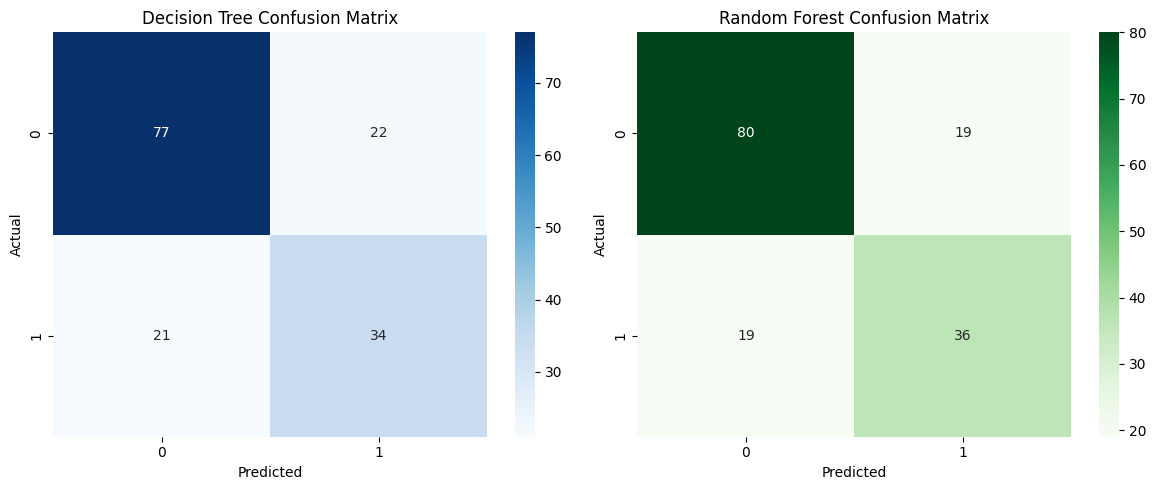

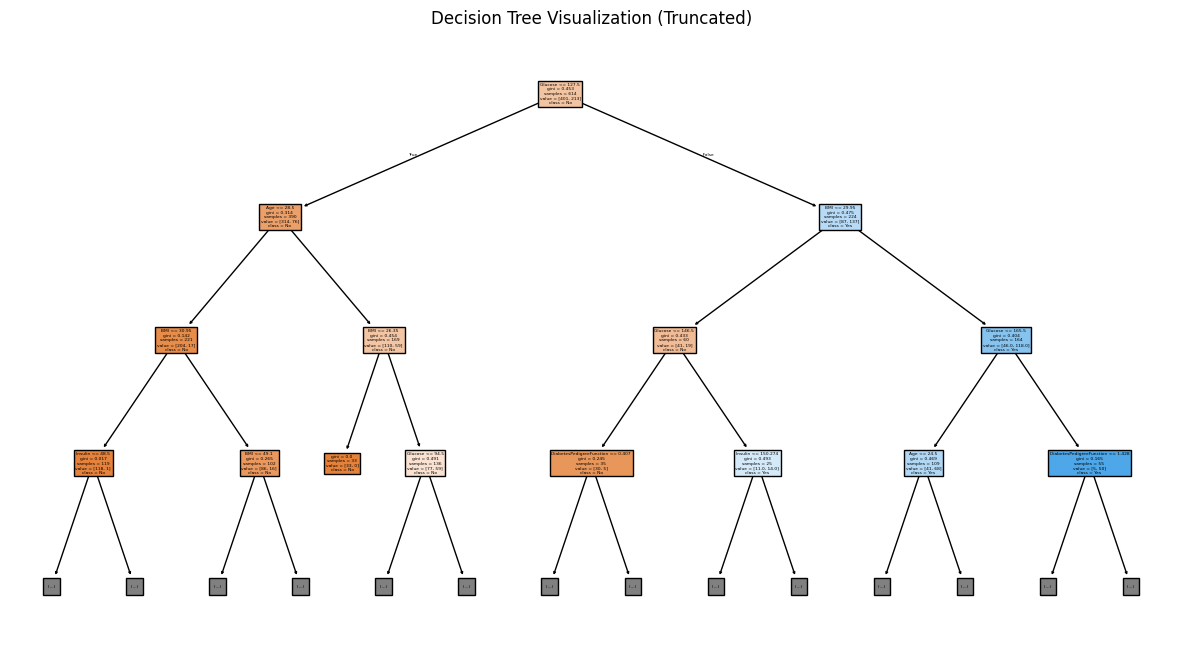

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# 1. Load Data
# Upload 'diabetes.csv' to Colab first
df = pd.read_csv('diabetes.csv')

# 2. Preprocessing
# In this dataset, 0 in Glucose/BP/BMI is effectively missing data. We replace with NaN then Mean.
cols_with_zeros = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
df[cols_with_zeros] = df[cols_with_zeros].replace(0, np.nan)
df.fillna(df.mean(), inplace=True)

X = df.drop('Outcome', axis=1)
y = df['Outcome']

# 3. Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- MODEL A: DECISION TREE ---
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

# --- MODEL B: RANDOM FOREST ---
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# --- EVALUATION ---
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))

print("\n--- Decision Tree Classification Report ---")
print(classification_report(y_test, y_pred_dt))

print("\n--- Random Forest Classification Report ---")
print(classification_report(y_test, y_pred_rf))

# --- VISUALIZATION: CONFUSION MATRIX COMPARISON ---
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.heatmap(confusion_matrix(y_test, y_pred_dt), annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title('Decision Tree Confusion Matrix')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')

sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Greens', ax=axes[1])
axes[1].set_title('Random Forest Confusion Matrix')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('Actual')

plt.tight_layout()
plt.show()

# --- VISUALIZATION: TREE STRUCTURE (First 3 levels) ---
plt.figure(figsize=(15, 8))
plot_tree(dt_model, max_depth=3, feature_names=X.columns, class_names=['No', 'Yes'], filled=True)
plt.title("Decision Tree Visualization (Truncated)")
plt.show()

In [ ]:
# --- TUNING DECISION TREE ---
param_dt = {'max_depth': [3, 5, 10, None], 'min_samples_split': [2, 5, 10]}
grid_dt = GridSearchCV(DecisionTreeClassifier(random_state=42), param_dt, cv=5)
grid_dt.fit(X_train, y_train)

# --- TUNING RANDOM FOREST ---
param_rf = {'n_estimators': [50, 100, 200], 'max_depth': [5, 10, None]}
grid_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_rf, cv=5)
grid_rf.fit(X_train, y_train)

print(f"Best DT Params: {grid_dt.best_params_}")
print(f"Best DT Accuracy: {grid_dt.best_score_:.4f}")
print(f"Best RF Params: {grid_rf.best_params_}")
print(f"Best RF Accuracy: {grid_rf.best_score_:.4f}")

Best DT Params: {'max_depth': 3, 'min_samples_split': 2}
Best DT Accuracy: 0.7476
Best RF Params: {'max_depth': 5, 'n_estimators': 50}
Best RF Accuracy: 0.7737
